In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [2]:
df = pd.read_csv('nutrition_1.csv')
df.head()

Unnamed: 0.1  Unnamed: 0             name serving_size  calories  \
0             0           0       Cornstarch        100 g       381   
1             1           1     Nuts, pecans        100 g       691   
2             2           2    Eggplant, raw        100 g        25   
3             3           3   Teff, uncooked        100 g       367   
4             4           4  Sherbet, orange        100 g       144   

   total_fat  saturated_fat  cholesterol  sodium  choline  ...      fat  \
0        0.1            NaN          0.0     9.0   0.4 mg  ...   0.05 g   
1       72.0            6.2          0.0     0.0  40.5 mg  ...  71.97 g   
2        0.2            NaN          0.0     2.0   6.9 mg  ...   0.18 g   
3        2.4            0.4          0.0    12.0  13.1 mg  ...   2.38 g   
4        2.0            1.2          1.0    46.0   7.7 mg  ...   2.00 g   

   saturated_fatty_acids monounsaturated_fatty_acids  \
0                  0.009                     0.016 g   
1                  6.180                    40.801 g   
2                  0.034                     0.016 g   
3                  0.449                     0.589 g   
4                  1.160                     0.530 g   

  polyunsaturated_fatty_acids fatty_acids_total_trans alcohol   ash caffeine  \
0                     0.025 g                 0.00 mg     0.0  0.09      0.0   
1                    21.614 g                 0.00 mg     0.0  1.49      0.0   
2                     0.076 g                 0.00 mg     0.0  0.66      0.0   
3                     1.071 g                       0     0.0  2.37      0.0   
4                     0.080 g                 1.00 mg     0.0  0.40      0.0   

  theobromine  water  
0         0.0   8.32  
1         0.0   3.52  
2         0.0  92.30  
3         0.0   8.82  
4         0.0  66.10  

[5 rows x 78 columns]

In [3]:
df.shape

(8789, 78)

In [4]:
# List of columns
a = list(df.columns)
for i in a:
    print(i)

Unnamed: 0.1
Unnamed: 0
name
serving_size
calories
total_fat
saturated_fat
cholesterol
sodium
choline
folate
folic_acid
niacin
pantothenic_acid
riboflavin
thiamin
vitamin_a
vitamin_a_rae
carotene_alpha
carotene_beta
cryptoxanthin_beta
lutein_zeaxanthin
lucopene
vitamin_b12
vitamin_b6
vitamin_c
vitamin_d
vitamin_e
tocopherol_alpha
vitamin_k
calcium
copper
irom
magnesium
manganese
phosphorous
potassium
selenium
zink
protein
alanine
arginine
aspartic_acid
cystine
glutamic_acid
glycine
histidine
hydroxyproline
isoleucine
leucine
lysine
methionine
phenylalanine
proline
serine
threonine
tryptophan
tyrosine
valine
carbohydrate
fiber
sugars
fructose
galactose
glucose
lactose
maltose
sucrose
fat
saturated_fatty_acids
monounsaturated_fatty_acids
polyunsaturated_fatty_acids
fatty_acids_total_trans
alcohol
ash
caffeine
theobromine
water


In [5]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'serving_size', 'lucopene'], axis = 1, inplace = True)

In [6]:
null_per = pd.DataFrame({'count': df.isna().sum(), 'Percentage': df.isna().sum()*100/8789})
null_per

count  Percentage
name               0    0.000000
calories           0    0.000000
total_fat          0    0.000000
saturated_fat   1590   18.090795
cholesterol        0    0.000000
...              ...         ...
alcohol            0    0.000000
ash                0    0.000000
caffeine           0    0.000000
theobromine        0    0.000000
water              0    0.000000

[74 rows x 2 columns]

In [7]:
null_per.Percentage.value_counts()

0.000000     73
18.090795     1
Name: Percentage, dtype: int64

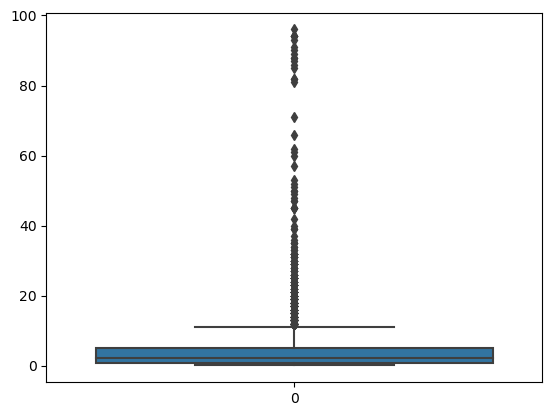

In [8]:
sns.boxplot(df['saturated_fat'])
plt.show()

In [9]:
df['saturated_fat'] = df['saturated_fat'].fillna(df['saturated_fat'].median())

In [10]:
df.isna().sum()

name             0
calories         0
total_fat        0
saturated_fat    0
cholesterol      0
                ..
alcohol          0
ash              0
caffeine         0
theobromine      0
water            0
Length: 74, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df

name  calories  total_fat  \
0                                            Cornstarch       381        0.1   
1                                          Nuts, pecans       691       72.0   
2                                         Eggplant, raw        25        0.2   
3                                        Teff, uncooked       367        2.4   
4                                       Sherbet, orange       144        2.0   
...                                                 ...       ...        ...   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...       125        3.5   
8785  Lamb, cooked, separable lean only, composite o...       206        8.9   
8786  Lamb, raw, separable lean and fat, composite o...       277       23.0   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   

      saturated_fat  cholesterol  sodium  choline     folate  folic_acid  \
0               2.2          0.0     9.0   0.4 mg   0.00 mcg         0.0   
1               6.2          0.0     0.0  40.5 mg  22.00 mcg         0.0   
2               2.2          0.0     2.0   6.9 mg  22.00 mcg         0.0   
3               0.4          0.0    12.0  13.1 mg          0         0.0   
4               1.2          1.0    46.0   7.7 mg   4.00 mcg         0.0   
...             ...          ...     ...      ...        ...         ...   
8784            1.4         62.0    54.0  64.5 mg   4.00 mcg         0.0   
8785            3.9        109.0    50.0        0   0.00 mcg         0.0   
8786           12.0         78.0    39.0        0   1.00 mcg         0.0   
8787            1.1         60.0    53.0  64.2 mg   4.00 mcg         0.0   
8788            1.1         60.0    53.0  64.2 mg   4.00 mcg         0.0   

        niacin  ...      fat saturated_fatty_acids  \
0     0.000 mg  ...   0.05 g                 0.009   
1     1.167 mg  ...  71.97 g                 6.180   
2     0.649 mg  ...   0.18 g                 0.034   
3     3.363 mg  ...   2.38 g                 0.449   
4     0.063 mg  ...   2.00 g                 1.160   
...        ...  ...      ...                   ...   
8784  6.422 mg  ...   3.50 g                 1.353   
8785  7.680 mg  ...   8.86 g                 3.860   
8786  6.550 mg  ...  22.74 g                11.570   
8787  6.720 mg  ...   3.04 g                 1.086   
8788  6.720 mg  ...   3.04 g                 1.086   

     monounsaturated_fatty_acids  polyunsaturated_fatty_acids  \
0                        0.016 g                      0.025 g   
1                       40.801 g                     21.614 g   
2                        0.016 g                      0.076 g   
3                        0.589 g                      1.071 g   
4                        0.530 g                      0.080 g   
...                          ...                          ...   
8784                     1.554 g                      0.244 g   
8785                     3.480 g                      0.520 g   
8786                     8.720 g                      0.980 g   
8787                     1.266 g                      0.233 g   
8788                     1.266 g                      0.233 g   

     fatty_acids_total_trans alcohol   ash caffeine theobromine  water  
0                    0.00 mg     0.0  0.09      0.0         0.0   8.32  
1                    0.00 mg     0.0  1.49      0.0         0.0   3.52  
2                    0.00 mg     0.0  0.66      0.0         0.0  92.30  
3                          0     0.0  2.37      0.0         0.0   8.82  
4                    1.00 mg     0.0  0.40      0.0         0.0  66.10  
...                      ...     ...   ...      ...         ...    ...  
8784                62.00 mg     0.0  1.11      0.0         0.0  72.51  
8785               109.00 mg     0.0  1.60      0.0         0.0  59.95  
8786                78.00 mg     0.0  0.92      0.0         0.0  59.80  
8787             

In [13]:
df.columns

Index(['name', 'calories', 'total_fat', 'saturated_fat', 'cholesterol',
       'sodium', 'choline', 'folate', 'folic_acid', 'niacin',
       'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a',
       'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'vitamin_b12', 'vitamin_b6',
       'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha', 'vitamin_k',
       'calcium', 'copper', 'irom', 'magnesium', 'manganese', 'phosphorous',
       'potassium', 'selenium', 'zink', 'protein', 'alanine', 'arginine',
       'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine',
       'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine',
       'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose',
       'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat',
       'saturated_fatty_acids', 'monounsaturated_fatty_acids',
 

In [14]:
all_cols = df.columns
num_cols = df.select_dtypes(['int32', 'int64', 'float32', 'float64'])
unformated_cols = [x for x in all_cols if x not in num_cols]
unformated_cols.remove('name')
print(unformated_cols)
print(len(unformated_cols))

['choline', 'folate', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'tocopherol_alpha', 'vitamin_k', 'copper', 'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium', 'zink', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'fat', 'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'fatty_acids_total_trans']
43


In [15]:
for i in unformated_cols:
    # save new name of column to `new_col1 var
    new_col = f"{i} ({df[i][0].split(' ')[-1]})"
    # change column name
    df = df.rename(columns = {i: new_col})
    # format data
    df[new_col] = df[new_col].apply(lambda row: row.split(' ')[0])
    # change data type of the columns
    df[new_col] = df[new_col].astype(float)

num_cols = df.select_dtypes(['int32', 'int64', 'float32', 'float64']).columns
df.select_dtypes(['int32', 'int64', 'float32', 'float64'])

calories  total_fat  saturated_fat  cholesterol  sodium  choline (mg)  \
0          381        0.1            2.2          0.0     9.0           0.4   
1          691       72.0            6.2          0.0     0.0          40.5   
2           25        0.2            2.2          0.0     2.0           6.9   
3          367        2.4            0.4          0.0    12.0          13.1   
4          144        2.0            1.2          1.0    46.0           7.7   
...        ...        ...            ...          ...     ...           ...   
8784       125        3.5            1.4         62.0    54.0          64.5   
8785       206        8.9            3.9        109.0    50.0           0.0   
8786       277       23.0           12.0         78.0    39.0           0.0   
8787       121        3.0            1.1         60.0    53.0          64.2   
8788       121        3.0            1.1         60.0    53.0          64.2   

      folate (mcg)  folic_acid  niacin (mg)  pantothenic_acid (mg)  ...  \
0              0.0         0.0        0.000                  0.000  ...   
1             22.0         0.0        1.167                  0.863  ...   
2             22.0         0.0        0.649                  0.281  ...   
3              0.0         0.0        3.363                  0.942  ...   
4              4.0         0.0        0.063                  0.224  ...   
...            ...         ...          ...                    ...  ...   
8784           4.0         0.0        6.422                  0.356  ...   
8785           0.0         0.0        7.680                  0.580  ...   
8786           1.0         0.0        6.550                  0.520  ...   
8787           4.0         0.0        6.720                  0.355  ...   
8788           4.0         0.0        6.720                  0.355  ...   

      fat (g)  saturated_fatty_acids  monounsaturated_fatty_acids (g)  \
0        0.05                  0.009                            0.016   
1       71.97                  6.180                           40.801   
2        0.18                  0.034                            0.016   
3        2.38                  0.449                            0.589   
4        2.00                  1.160                            0.530   
...       ...                    ...                              ...   
8784     3.50                  1.353                            1.554   
8785     8.86                  3.860                            3.480   
8786    22.74                 11.570                            8.720   
8787     3.04                  1.086                            1.266   
8788     3.04                  1.086                            1.266   

      polyunsaturated_fatty_acids (g)  fatty_acids_total_trans (mg)  alcohol  \
0                               0.025                           0.0      0.0   
1                              21.614                           0.0      0.0   
2                               0.076                           0.0      0.0   
3                               1.071                           0.0      0.0   
4                               0.080                           1.0      0.0   
...                               ...                           ...      ...   
8784                            0.244                          62.0      0.0   
8785                            0.520                         109.0      0.0   
8786                            0.980                          78.0      0.0   
8787                            0.233                          60.0      0.0   
8788                            0.233                          60.0      0.0   

       ash  caffeine  theobromine  water  
0     0.09       0.0          0.0   8.32  
1     1.49       0.0          0.0   3.52  
2     0.66       0.0          0.0  92.30  
3     2.37       0.0          0.0   8.82  
4     0.40       0.0          0.0  66.10  
...    ...       ...          ...    ...  
8784  1.11       

In [16]:
for i in num_cols:
    print(i)
    print(f"Upper limit", df[i].mean() + 3*df[i].std())
    print(f"Lower limit", df[i].mean() - 3*df[i].std())
    print(f"Standard deviation", df[i].std())
    temp = df[(df[i] > df[i].mean() + 3*df[i].std()) | (df[i] < df[i].mean() - 3*df[i].std())].shape
    print(f"Shape of outlier dataframe", temp)
    percentage = temp[0]/df.shape[0] * 100
    print(f"Percentage of outliers", percentage)

calories
Upper limit 735.8698819220442
Lower limit -283.30212677356315
Standard deviation 169.8620014492679
Shape of outlier dataframe (120, 74)
Percentage of outliers 1.3653430424394128
total_fat
Upper limit 58.01159753012642
Lower limit -36.8978872104086
Standard deviation 15.818247456755836
Shape of outlier dataframe (213, 74)
Percentage of outliers 2.423483900329958
saturated_fat
Upper limit 22.645191802466965
Lower limit -14.980633832276954
Standard deviation 6.270970939123986
Shape of outlier dataframe (125, 74)
Percentage of outliers 1.4222323358743885
cholesterol
Upper limit 390.7998950827232
Lower limit -313.35376924360617
Standard deviation 117.35894405438822
Shape of outlier dataframe (69, 74)
Percentage of outliers 0.7850722494026624
sodium
Upper limit 3124.0152565833364
Lower limit -2511.307553773005
Standard deviation 939.2204683927235
Shape of outlier dataframe (47, 74)
Percentage of outliers 0.53475935828877
choline (mg)
Upper limit 177.67804363308997
Lower limit -130.3

In [17]:
df

name  calories  total_fat  \
0                                            Cornstarch       381        0.1   
1                                          Nuts, pecans       691       72.0   
2                                         Eggplant, raw        25        0.2   
3                                        Teff, uncooked       367        2.4   
4                                       Sherbet, orange       144        2.0   
...                                                 ...       ...        ...   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...       125        3.5   
8785  Lamb, cooked, separable lean only, composite o...       206        8.9   
8786  Lamb, raw, separable lean and fat, composite o...       277       23.0   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   

      saturated_fat  cholesterol  sodium  choline (mg)  folate (mcg)  \
0               2.2          0.0     9.0           0.4           0.0   
1               6.2          0.0     0.0          40.5          22.0   
2               2.2          0.0     2.0           6.9          22.0   
3               0.4          0.0    12.0          13.1           0.0   
4               1.2          1.0    46.0           7.7           4.0   
...             ...          ...     ...           ...           ...   
8784            1.4         62.0    54.0          64.5           4.0   
8785            3.9        109.0    50.0           0.0           0.0   
8786           12.0         78.0    39.0           0.0           1.0   
8787            1.1         60.0    53.0          64.2           4.0   
8788            1.1         60.0    53.0          64.2           4.0   

      folic_acid  niacin (mg)  ...  fat (g)  saturated_fatty_acids  \
0            0.0        0.000  ...     0.05                  0.009   
1            0.0        1.167  ...    71.97                  6.180   
2            0.0        0.649  ...     0.18                  0.034   
3            0.0        3.363  ...     2.38                  0.449   
4            0.0        0.063  ...     2.00                  1.160   
...          ...          ...  ...      ...                    ...   
8784         0.0        6.422  ...     3.50                  1.353   
8785         0.0        7.680  ...     8.86                  3.860   
8786         0.0        6.550  ...    22.74                 11.570   
8787         0.0        6.720  ...     3.04                  1.086   
8788         0.0        6.720  ...     3.04                  1.086   

      monounsaturated_fatty_acids (g)  polyunsaturated_fatty_acids (g)  \
0                               0.016                            0.025   
1                              40.801                           21.614   
2                               0.016                            0.076   
3                               0.589                            1.071   
4                               0.530                            0.080   
...                               ...                              ...   
8784                            1.554                            0.244   
8785                            3.480                            0.520   
8786                            8.720                            0.980   
8787                            1.266                            0.233   
8788                            1.266                            0.233   

      fatty_acids_total_trans (mg)  alcohol   ash  caffeine  theobromine  \
0                              0.0      0.0  0.09       0.0          0.0   
1                              0.0      0.0  1.49       0.0          0.0   
2                              0.0      0.0  0.66       0.0          0.0   
3                              0.0      0.0  2.37       0.0          0.0   
4                              1.0      0.0  0.40       0.0          0.0   
...                            ...     

In [18]:
# Detect outliers using IQR
for i in num_cols:
    print(i)
    q1 = np.percentile(df[i], 25, interpolation='midpoint')
    q3 = np.percentile(df[i], 75, interpolation='midpoint')
    iqr = q3 - q1
    ul = q3 +1.5*iqr
    ll = q1 - 1.5*iqr
    outliers = df[(df[i] > ul) | (df[i] < ll)]
    print(f"Shape of outliers: {outliers.shape}")
    print(f"Percentage of outliers: {outliers.shape[0]/df.shape[0] * 100}")

calories
Shape of outliers: (148, 74)
Percentage of outliers: 1.6839230856752758
total_fat
Shape of outliers: (475, 74)
Percentage of outliers: 5.404482876322676
saturated_fat
Shape of outliers: (843, 74)
Percentage of outliers: 9.591534873136876
cholesterol
Shape of outliers: (184, 74)
Percentage of outliers: 2.0935259984070997
sodium
Shape of outliers: (473, 74)
Percentage of outliers: 5.381727158948686
choline (mg)
Shape of outliers: (1085, 74)
Percentage of outliers: 12.344976675389692
folate (mcg)
Shape of outliers: (1016, 74)
Percentage of outliers: 11.559904425987028
folic_acid
Shape of outliers: (1183, 74)
Percentage of outliers: 13.460006826715212
niacin (mg)
Shape of outliers: (301, 74)
Percentage of outliers: 3.4247354647855275
pantothenic_acid (mg)
Shape of outliers: (301, 74)
Percentage of outliers: 3.4247354647855275
riboflavin (mg)
Shape of outliers: (569, 74)
Percentage of outliers: 6.474001592900216
thiamin (mg)
Shape of outliers: (854, 74)
Percentage of outliers: 9.71

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/3011054223.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(df[i], 25, interpolation='midpoint')
/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/3011054223.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(df[i], 75, interpolation='midpoint')


In [19]:
# iterate through df columns
for i in num_cols:
    # print column name
    print(i)
    # print upper limit of the column
    print(f"Upper limit",df[i].mean() + 3*df[i].std())
    # print lower limit of the column
    print(f"lower limit",df[i].mean() - 3*df[i].std())
    # get shape of outlier dataframe 
    df = df[~(df[i] > df[i].mean() + 3*df[i].std()) | (df[i] < df[i].mean() - 3*df[i].std())]

df

calories
Upper limit 735.8698819220442
lower limit -283.30212677356315
total_fat
Upper limit 45.22811446365358
lower limit -26.569168795179706
saturated_fat
Upper limit 14.139802382499305
lower limit -7.7816936354543875
cholesterol
Upper limit 385.17464366877465
lower limit -308.1486492303754
sodium
Upper limit 3201.6518450643316
lower limit -2581.7291150216743
choline (mg)
Upper limit 134.13475639933358
lower limit -88.77151660028936
folate (mcg)
Upper limit 412.4247593807314
lower limit -325.63177519100816
folic_acid
Upper limit 120.60888879354904
lower limit -102.73915410223758
niacin (mg)
Upper limit 13.569496981173913
lower limit -7.5267429080501165
pantothenic_acid (mg)
Upper limit 2.2707469354343734
lower limit -1.4641520888721564
riboflavin (mg)
Upper limit 0.7264225686740114
lower limit -0.38823629673269633
thiamin (mg)
Upper limit 1.1355504045991078
lower limit -0.831263325798365
vitamin_a
Upper limit 6037.307521378798
lower limit -5162.019141847881
vitamin_a_rae (mcg)
Upper 

name  calories  total_fat  \
4                                       Sherbet, orange       144        2.0   
5                                      Cauliflower, raw        25        0.3   
7                                     Lamb, raw, ground       282       23.0   
10                                  PACE, Picante Sauce        25        0.0   
13                                 Crackers, rusk toast       407        7.2   
...                                                 ...       ...        ...   
8783  Beef, raw, all grades, trimmed to 0" fat, sepa...       124        3.3   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...       125        3.5   
8785  Lamb, cooked, separable lean only, composite o...       206        8.9   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   

      saturated_fat  cholesterol  sodium  choline (mg)  folate (mcg)  \
4               1.2          1.0    46.0           7.7           4.0   
5               0.1          0.0    30.0          44.3          57.0   
7              10.0         73.0    59.0          69.3          18.0   
10              2.2          0.0   781.0           0.0           0.0   
13              1.4         78.0   253.0           0.0          87.0   
...             ...          ...     ...           ...           ...   
8783            1.3         62.0    54.0          64.6           4.0   
8784            1.4         62.0    54.0          64.5           4.0   
8785            3.9        109.0    50.0           0.0           0.0   
8787            1.1         60.0    53.0          64.2           4.0   
8788            1.1         60.0    53.0          64.2           4.0   

      folic_acid  niacin (mg)  ...  fat (g)  saturated_fatty_acids  \
4            0.0        0.063  ...     2.00                  1.160   
5            0.0        0.507  ...     0.28                  0.130   
7            0.0        5.960  ...    23.41                 10.190   
10           0.0        0.000  ...     0.00                  0.000   
13          23.0        4.625  ...     7.20                  1.376   
...          ...          ...  ...      ...                    ...   
8783         0.0        6.433  ...     3.34                  1.287   
8784         0.0        6.422  ...     3.50                  1.353   
8785         0.0        7.680  ...     8.86                  3.860   
8787         0.0        6.720  ...     3.04                  1.086   
8788         0.0        6.720  ...     3.04                  1.086   

      monounsaturated_fatty_acids (g)  polyunsaturated_fatty_acids (g)  \
4                               0.530                            0.080   
5                               0.034                            0.031   
7                               9.600                            1.850   
10                              0.000                            0.000   
13                              2.755                            2.310   
...                               ...                              ...   
8783                            1.481                            0.238   
8784                            1.554                            0.244   
8785                            3.480                            0.520   
8787                            1.266                            0.233   
8788                            1.266                            0.233   

      fatty_acids_total_trans (mg)  alcohol   ash  caffeine  theobromine  \
4                              1.0      0.0  0.40       0.0          0.0   
5                              0.0      0.0  0.76       0.0          0.0   
7                             73.0      0.0  0.87       0.0          0.0   
10                             0.0      0.0  3.85       0.0          0.0   
13                            78.0      0.0  1.20       0.0          0.0   
...                            ...     

In [20]:
df.mean()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


calories         151.084560
total_fat          6.276548
saturated_fat      2.569423
cholesterol       36.415791
sodium           210.879701
                    ...    
alcohol            0.010839
ash                1.222614
caffeine           0.038075
theobromine        0.079187
water             69.031696
Length: 73, dtype: float64

In [21]:
df.median()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


calories         136.00
total_fat          4.10
saturated_fat      2.20
cholesterol       14.00
sodium            75.00
                  ...  
alcohol            0.00
ash                1.07
caffeine           0.00
theobromine        0.00
water             71.10
Length: 73, dtype: float64

In [22]:
df['name'].value_counts

<bound method IndexOpsMixin.value_counts of 4                                         Sherbet, orange
5                                        Cauliflower, raw
7                                       Lamb, raw, ground
10                                    PACE, Picante Sauce
13                                   Crackers, rusk toast
                              ...                        
8783    Beef, raw, all grades, trimmed to 0" fat, sepa...
8784    Beef, raw, all grades, trimmed to 0" fat, sepa...
8785    Lamb, cooked, separable lean only, composite o...
8787    Beef, raw, all grades, trimmed to 0" fat, sepa...
8788    Beef, raw, all grades, trimmed to 0" fat, sepa...
Name: name, Length: 4281, dtype: object>

In [23]:
df['name'].duplicated().sum()

0

In [24]:
df['name'].nunique()

4281

In [25]:
df['name'].mode()

0                  ANDREA'S, Gluten Free Soft Dinner Roll
1                    APPLEBEE'S, 9 oz house sirloin steak
2                                APPLEBEE'S, french fries
3                         APPLEBEE'S, hand battered, fish
4       ARCHWAY Home Style Cookies, Chocolate Chip Ice...
                              ...                        
4276                     Yogurt, whole milk, fruit, Greek
4277                     Yogurt, whole milk, plain, Greek
4278    Yogurt, with low calorie sweetener, lowfat, fruit
4279    Yogurt, with low-calorie sweetener, nonfat mil...
4280          Yokan, prepared from adzuki beans and sugar
Name: name, Length: 4281, dtype: object

In [26]:
num_features = df.select_dtypes(['int32', 'int64', 'float32', 'float64']).columns
num_features

Index(['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline (mg)', 'folate (mcg)', 'folic_acid', 'niacin (mg)',
       'pantothenic_acid (mg)', 'riboflavin (mg)', 'thiamin (mg)', 'vitamin_a',
       'vitamin_a_rae (mcg)', 'carotene_alpha (mcg)', 'carotene_beta (mcg)',
       'cryptoxanthin_beta (mcg)', 'lutein_zeaxanthin (mcg)', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha (mg)', 'vitamin_k (mcg)', 'calcium', 'copper (mg)',
       'irom', 'magnesium (mg)', 'manganese (mg)', 'phosphorous (mg)',
       'potassium (mg)', 'selenium (mcg)', 'zink (mg)', 'protein',
       'alanine (g)', 'arginine (g)', 'aspartic_acid (g)', 'cystine (g)',
       'glutamic_acid (g)', 'glycine (g)', 'histidine (g)',
       'hydroxyproline (0)', 'isoleucine (g)', 'leucine (g)', 'lysine (g)',
       'methionine (g)', 'phenylalanine (g)', 'proline (g)', 'serine (g)',
       'threonine (g)', 'tryptophan (g)', 'tyrosine (g)', 'valin

In [27]:
df_mode = []
for i in num_features:
    df_mode.append(df[i].mode().values)

pd.DataFrame({'Name': num_features, 'modes': df_mode})
num_features

Index(['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline (mg)', 'folate (mcg)', 'folic_acid', 'niacin (mg)',
       'pantothenic_acid (mg)', 'riboflavin (mg)', 'thiamin (mg)', 'vitamin_a',
       'vitamin_a_rae (mcg)', 'carotene_alpha (mcg)', 'carotene_beta (mcg)',
       'cryptoxanthin_beta (mcg)', 'lutein_zeaxanthin (mcg)', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha (mg)', 'vitamin_k (mcg)', 'calcium', 'copper (mg)',
       'irom', 'magnesium (mg)', 'manganese (mg)', 'phosphorous (mg)',
       'potassium (mg)', 'selenium (mcg)', 'zink (mg)', 'protein',
       'alanine (g)', 'arginine (g)', 'aspartic_acid (g)', 'cystine (g)',
       'glutamic_acid (g)', 'glycine (g)', 'histidine (g)',
       'hydroxyproline (0)', 'isoleucine (g)', 'leucine (g)', 'lysine (g)',
       'methionine (g)', 'phenylalanine (g)', 'proline (g)', 'serine (g)',
       'threonine (g)', 'tryptophan (g)', 'tyrosine (g)', 'valin

In [28]:
df

name  calories  total_fat  \
4                                       Sherbet, orange       144        2.0   
5                                      Cauliflower, raw        25        0.3   
7                                     Lamb, raw, ground       282       23.0   
10                                  PACE, Picante Sauce        25        0.0   
13                                 Crackers, rusk toast       407        7.2   
...                                                 ...       ...        ...   
8783  Beef, raw, all grades, trimmed to 0" fat, sepa...       124        3.3   
8784  Beef, raw, all grades, trimmed to 0" fat, sepa...       125        3.5   
8785  Lamb, cooked, separable lean only, composite o...       206        8.9   
8787  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   
8788  Beef, raw, all grades, trimmed to 0" fat, sepa...       121        3.0   

      saturated_fat  cholesterol  sodium  choline (mg)  folate (mcg)  \
4               1.2          1.0    46.0           7.7           4.0   
5               0.1          0.0    30.0          44.3          57.0   
7              10.0         73.0    59.0          69.3          18.0   
10              2.2          0.0   781.0           0.0           0.0   
13              1.4         78.0   253.0           0.0          87.0   
...             ...          ...     ...           ...           ...   
8783            1.3         62.0    54.0          64.6           4.0   
8784            1.4         62.0    54.0          64.5           4.0   
8785            3.9        109.0    50.0           0.0           0.0   
8787            1.1         60.0    53.0          64.2           4.0   
8788            1.1         60.0    53.0          64.2           4.0   

      folic_acid  niacin (mg)  ...  fat (g)  saturated_fatty_acids  \
4            0.0        0.063  ...     2.00                  1.160   
5            0.0        0.507  ...     0.28                  0.130   
7            0.0        5.960  ...    23.41                 10.190   
10           0.0        0.000  ...     0.00                  0.000   
13          23.0        4.625  ...     7.20                  1.376   
...          ...          ...  ...      ...                    ...   
8783         0.0        6.433  ...     3.34                  1.287   
8784         0.0        6.422  ...     3.50                  1.353   
8785         0.0        7.680  ...     8.86                  3.860   
8787         0.0        6.720  ...     3.04                  1.086   
8788         0.0        6.720  ...     3.04                  1.086   

      monounsaturated_fatty_acids (g)  polyunsaturated_fatty_acids (g)  \
4                               0.530                            0.080   
5                               0.034                            0.031   
7                               9.600                            1.850   
10                              0.000                            0.000   
13                              2.755                            2.310   
...                               ...                              ...   
8783                            1.481                            0.238   
8784                            1.554                            0.244   
8785                            3.480                            0.520   
8787                            1.266                            0.233   
8788                            1.266                            0.233   

      fatty_acids_total_trans (mg)  alcohol   ash  caffeine  theobromine  \
4                              1.0      0.0  0.40       0.0          0.0   
5                              0.0      0.0  0.76       0.0          0.0   
7                             73.0      0.0  0.87       0.0          0.0   
10                             0.0      0.0  3.85       0.0          0.0   
13                            78.0      0.0  1.20       0.0          0.0   
...                            ...     

In [29]:
df_max = []
df_min = []
df_range = []
for i in num_features:
    df_max.append(df[[i]].max())
    df_min.append(df[[i]].min())
    df_range.append(df[[i]].max() - df[[i]].min())

In [30]:
df_range

[calories    514
 dtype: int64,
 total_fat    31.0
 dtype: float64,
 saturated_fat    10.9
 dtype: float64,
 cholesterol    161.0
 dtype: float64,
 sodium    2000.0
 dtype: float64,
 choline (mg)    133.6
 dtype: float64,
 folate (mcg)    338.0
 dtype: float64,
 folic_acid    120.0
 dtype: float64,
 niacin (mg)    13.365
 dtype: float64,
 pantothenic_acid (mg)    2.16
 dtype: float64,
 riboflavin (mg)    0.7
 dtype: float64,
 thiamin (mg)    1.116
 dtype: float64,
 vitamin_a    5772.0
 dtype: float64,
 vitamin_a_rae (mcg)    260.0
 dtype: float64,
 carotene_alpha (mcg)    163.0
 dtype: float64,
 carotene_beta (mcg)    552.0
 dtype: float64,
 cryptoxanthin_beta (mcg)    78.0
 dtype: float64,
 lutein_zeaxanthin (mcg)    595.0
 dtype: float64,
 vitamin_b12    7.16
 dtype: float64,
 vitamin_b6    0.84
 dtype: float64,
 vitamin_c    146.4
 dtype: float64,
 vitamin_d    160.0
 dtype: float64,
 vitamin_e    1.67
 dtype: float64,
 tocopherol_alpha (mg)    1.67
 dtype: float64,
 vitamin_k (mcg)

In [31]:
df.nunique()

name             4281
calories          438
total_fat         120
saturated_fat     101
cholesterol       158
                 ... 
alcohol            10
ash               378
caffeine           10
theobromine        12
water            2526
Length: 74, dtype: int64

In [32]:
df.var()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


calories          9827.029297
total_fat           41.064833
saturated_fat        4.915362
cholesterol       1543.036423
sodium           73903.212394
                     ...     
alcohol              0.048378
ash                  0.615081
caffeine             0.270279
theobromine          1.625270
water              366.613762
Length: 73, dtype: float64

In [33]:
df.std()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


calories          99.131374
total_fat          6.408185
saturated_fat      2.217061
cholesterol       39.281502
sodium           271.851453
                    ...    
alcohol            0.219950
ash                0.784271
caffeine           0.519884
theobromine        1.274861
water             19.147161
Length: 73, dtype: float64

In [34]:
df.describe()

calories    total_fat  saturated_fat  cholesterol       sodium  \
count  4281.000000  4281.000000    4281.000000  4281.000000  4281.000000   
mean    151.084560     6.276548       2.569423    36.415791   210.879701   
std      99.131374     6.408185       2.217061    39.281502   271.851453   
min       0.000000     0.000000       0.100000     0.000000     0.000000   
25%      70.000000     0.700000       1.000000     0.000000    46.000000   
50%     136.000000     4.100000       2.200000    14.000000    75.000000   
75%     215.000000    10.000000       3.300000    70.000000   329.000000   
max     514.000000    31.000000      11.000000   161.000000  2000.000000   

       choline (mg)  folate (mcg)   folic_acid  niacin (mg)  \
count   4281.000000   4281.000000  4281.000000  4281.000000   
mean      23.284490     15.931792     3.225882     2.929760   
std       34.450618     27.208129    12.569067     2.818742   
min        0.000000      0.000000     0.000000     0.000000   
25%        0.000000      1.000000     0.000000     0.310000   
50%        0.000000      7.000000     0.000000     2.100000   
75%       46.000000     16.000000     0.000000     5.241000   
max      133.600000    338.000000   120.000000    13.365000   

       pantothenic_acid (mg)  ...      fat (g)  saturated_fatty_acids  \
count            4281.000000  ...  4281.000000            4281.000000   
mean                0.372622  ...     6.272205               2.132996   
std                 0.374485  ...     6.403094               2.450752   
min                 0.000000  ...     0.000000               0.000000   
25%                 0.000000  ...     0.700000               0.111000   
50%                 0.294000  ...     4.110000               1.278000   
75%                 0.629000  ...    10.130000               3.280000   
max                 2.160000  ...    31.400000              11.060000   

       monounsaturated_fatty_acids (g)  polyunsaturated_fatty_acids (g)  \
count                      4281.000000                      4281.000000   
mean                          2.378480                         0.866009   
std                           2.743377                         1.202972   
min                           0.000000                         0.000000   
25%                           0.038000                         0.090000   
50%                           1.352000                         0.410000   
75%                           3.875000                         1.050000   
max                          11.620000                         6.785000   

       fatty_acids_total_trans (mg)      alcohol          ash     caffeine  \
count                   4281.000000  4281.000000  4281.000000  4281.000000   
mean                      36.415791     0.010839     1.222614     0.038075   
std                       39.281502     0.219950     0.784271     0.519884   
min                        0.000000     0.000000     0.000000     0.000000   
25%                        0.000000     0.000000     0.800000     0.000000   
50%                       14.000000     0.000000     1.070000     0.000000   
75%                       70.000000     0.000000     1.460000     0.000000   
max                      161.000000     6.400000     4.110000    11.000000   

       theobromine        water  
count  4281.000000  4281.000000  
mean      0.079187    69.031696  
std       1.274861    19.147161  
min       0.000000     1.000000  
25%       0.000000    60.900000  
50%       0.000000    71.100000  
75%       0.000000    83.000000  
max      28.000000   100.000000  

[8 rows x 73 columns]

In [35]:
df.corr()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


calories  total_fat  saturated_fat  cholesterol    sodium  \
calories       1.000000   0.801008       0.595858     0.427580  0.223071   
total_fat      0.801008   1.000000       0.858547     0.593308  0.153671   
saturated_fat  0.595858   0.858547       1.000000     0.483429 -0.009013   
cholesterol    0.427580   0.593308       0.483429     1.000000 -0.073633   
sodium         0.223071   0.153671      -0.009013    -0.073633  1.000000   
...                 ...        ...            ...          ...       ...   
alcohol       -0.054684  -0.048272      -0.008213    -0.045693 -0.029603   
ash            0.245851   0.199675       0.016809     0.134357  0.745534   
caffeine      -0.093309  -0.066645      -0.018308    -0.065840 -0.051317   
theobromine   -0.024294  -0.027634      -0.016155    -0.042741 -0.025315   
water         -0.958993  -0.607471      -0.395847    -0.262069 -0.266978   

               choline (mg)  folate (mcg)  folic_acid  niacin (mg)  \
calories           0.201611      0.269501    0.280216     0.442132   
total_fat          0.258942      0.011644    0.059015     0.444593   
saturated_fat      0.178916     -0.065501   -0.021145     0.289406   
cholesterol        0.554076     -0.226507   -0.121633     0.744884   
sodium            -0.014267      0.142507    0.190186    -0.028456   
...                     ...           ...         ...          ...   
alcohol           -0.027831     -0.024258   -0.012650    -0.047747   
ash                0.113514      0.051887    0.170873     0.162772   
caffeine          -0.042612     -0.037262   -0.013831    -0.073221   
theobromine       -0.005422     -0.006668    0.011059    -0.055068   
water             -0.124811     -0.369675   -0.349797    -0.351022   

               pantothenic_acid (mg)  ...   fat (g)  saturated_fatty_acids  \
calories                    0.263427  ...  0.801033               0.703461   
total_fat                   0.324288  ...  0.999738               0.934672   
saturated_fat               0.195903  ...  0.858973               0.934901   
cholesterol                 0.635290  ...  0.593566               0.595476   
sodium                     -0.078177  ...  0.153762               0.066947   
...                              ...  ...       ...                    ...   
alcohol                    -0.045646  ... -0.048276              -0.042895   
ash                         0.113566  ...  0.199884               0.122943   
caffeine                   -0.064669  ... -0.066614              -0.058396   
theobromine                -0.015668  ... -0.027563              -0.021249   
water                      -0.174287  ... -0.607331              -0.502365   

               monounsaturated_fatty_acids (g)  \
calories                              0.733618   
total_fat                             0.947698   
saturated_fat                         0.830899   
cholesterol                           0.614886   
sodium                                0.128817   
...                                        ...   
alcohol                              -0.042731   
ash                                   0.192412   
caffeine                             -0.058775   
theobromine                          -0.021384   
water                                -0.538891   

               polyunsaturated_fatty_acids (g)  fatty_acids_total_trans (mg)  \
calories                              0.619586                      0.427580   
total_fat                             0.589240                      0.593308   
saturated_fat                         0.306093                      0.483429   
cholesterol                           0.210723                      1.000000   
sodium                                0.326778                     -0.073633   
...                                        ...                           ...   
alcohol                              -0.035468                     -0.045693   
ash                                   0.236926                      0.134357   
caf

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/2231141390.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


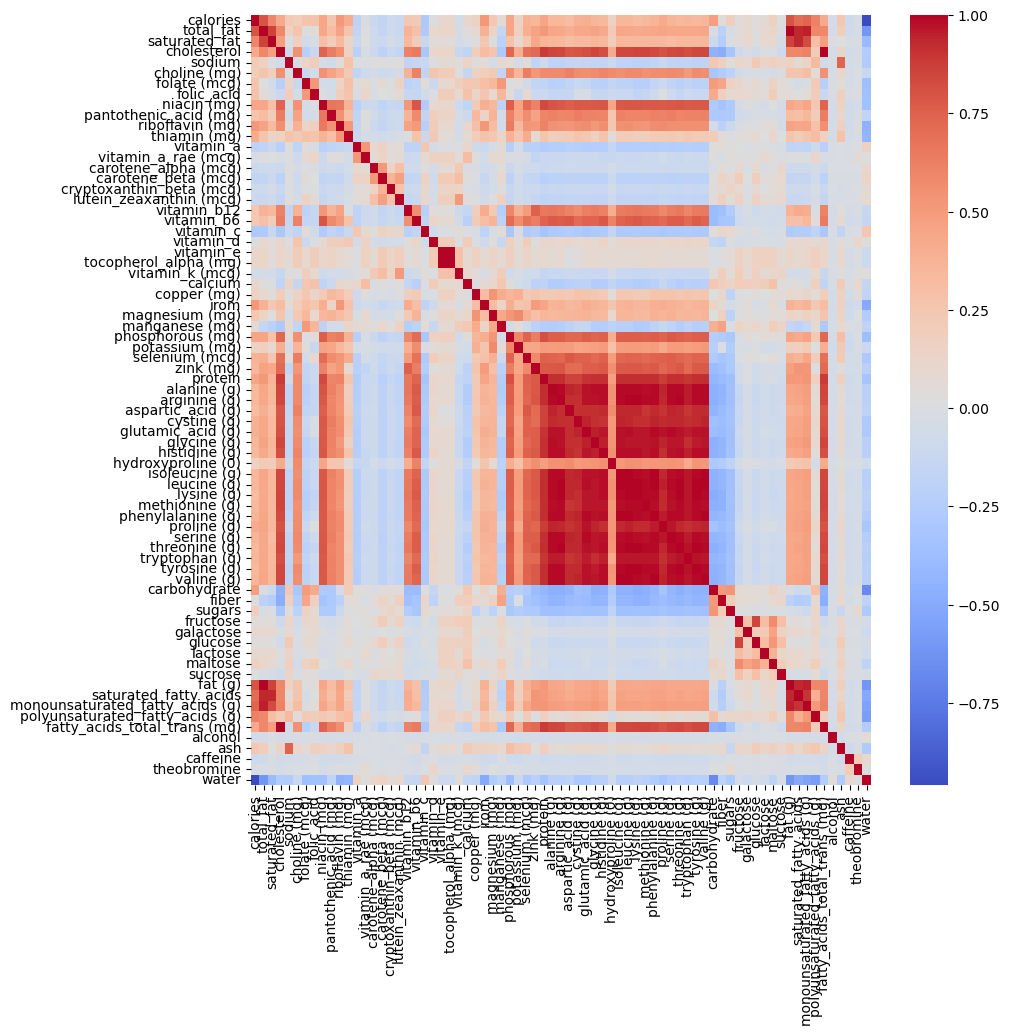

In [36]:
corr = df.corr()
_, ax = plt.subplots(figsize=(10,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

<Figure size 1800x1500 with 0 Axes>

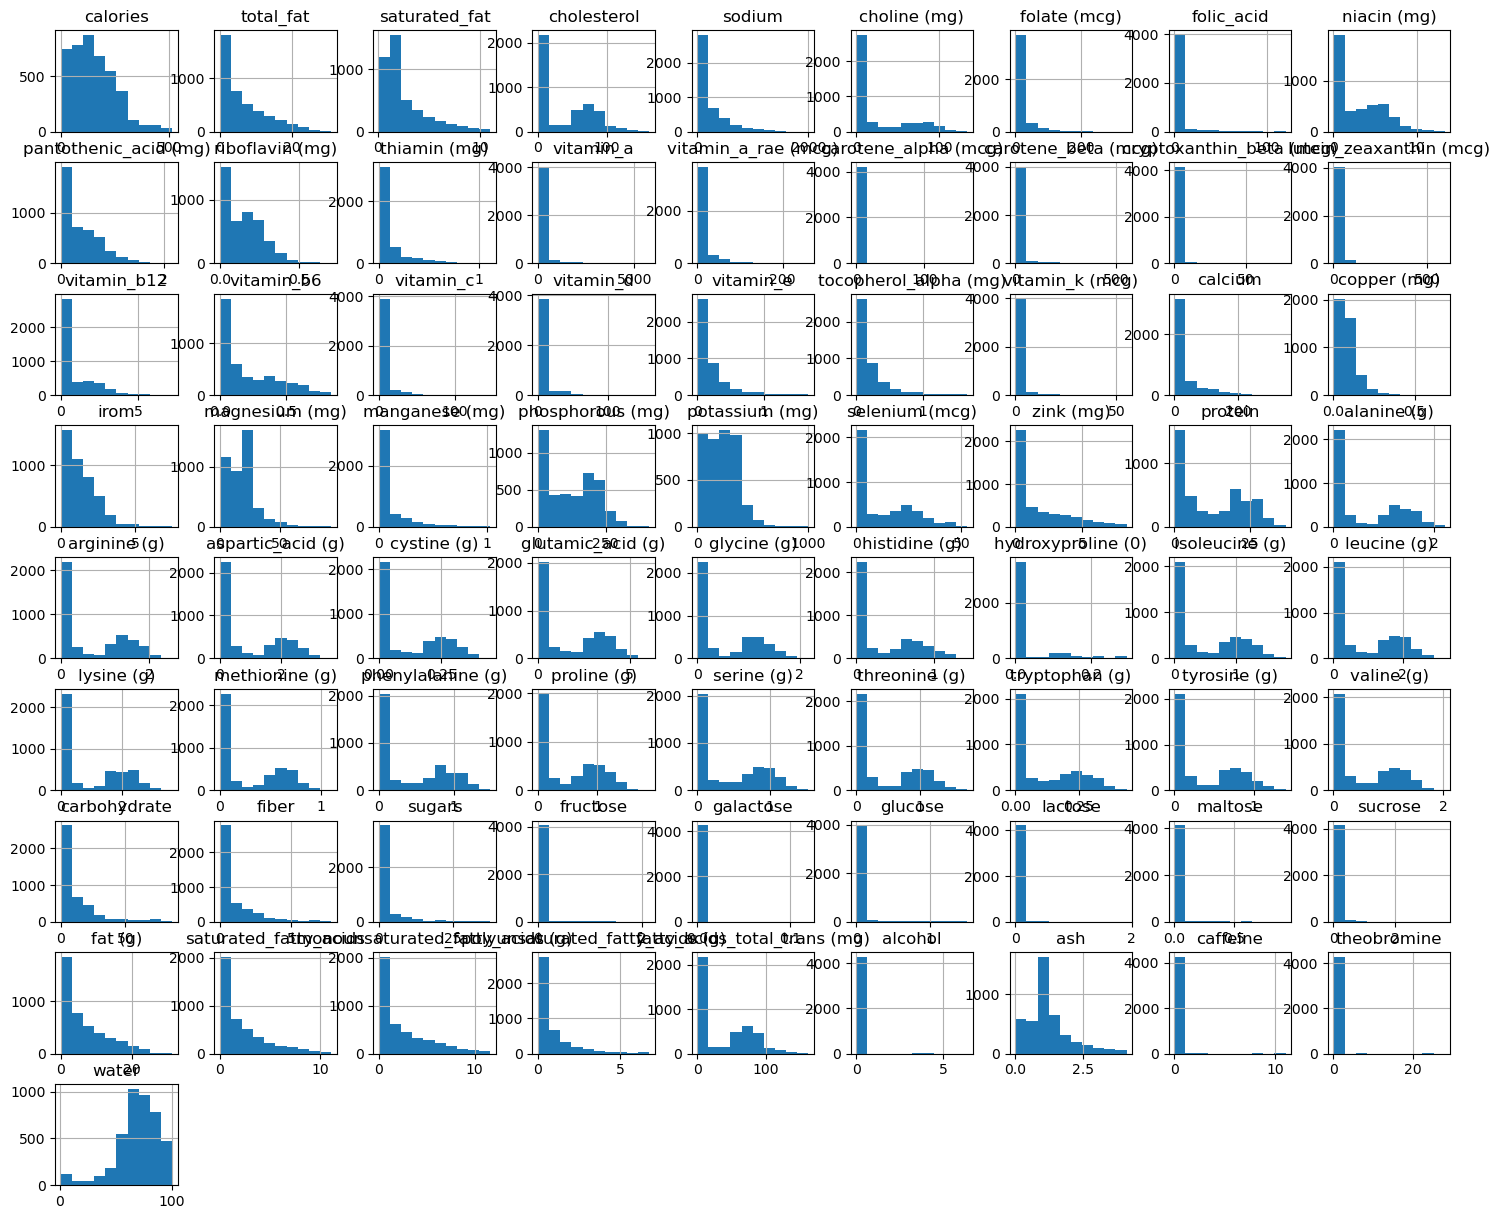

In [37]:
plt.figure(figsize=(18,15))

hist_df = df[num_features]
hist_df.hist(figsize=(18,15))
plt.show()

In [38]:
px.histogram(x=df['total_fat']) 

In [39]:
px.histogram(x=df['protein']) 

In [40]:
px.histogram(x=df['calories']) 

In [41]:
px.histogram(x=df['cholesterol'])

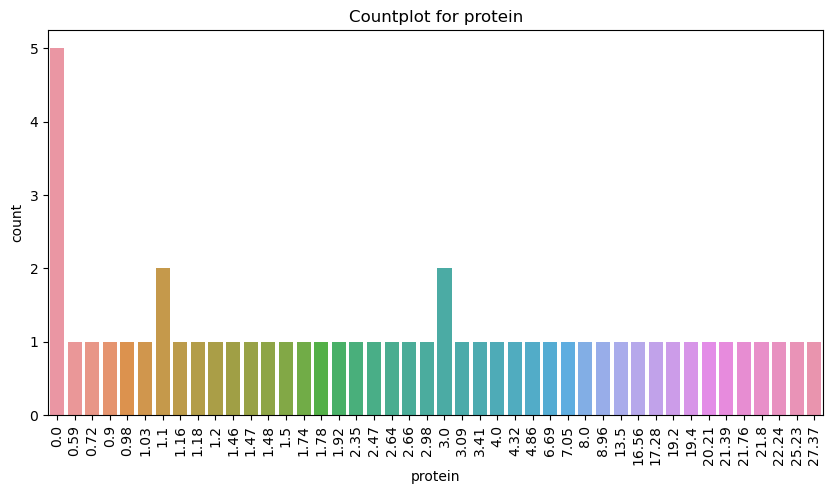

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(data=df[:50], x="protein")
plt.title('Countplot for protein')
plt.xticks(rotation=90)
plt.show()

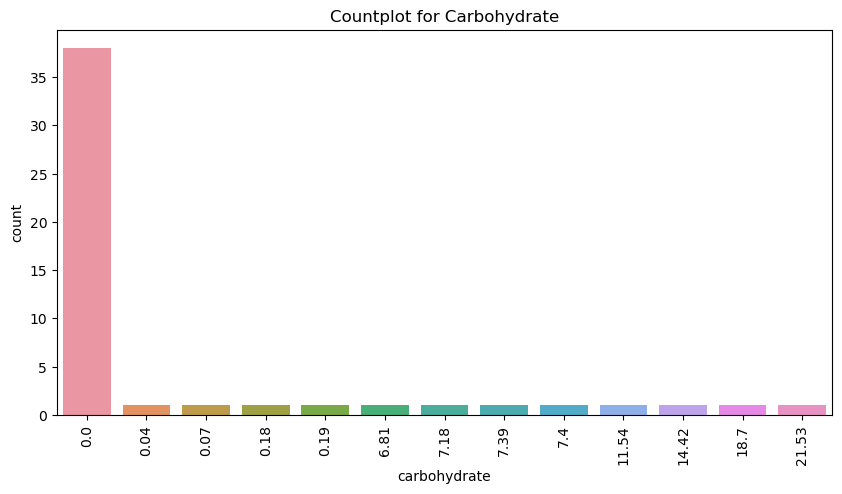

In [43]:
plt.figure(figsize = (10,5))
sns.countplot(data=df.tail(50), x="carbohydrate")
plt.title('Countplot for Carbohydrate')
plt.xticks(rotation=90)
plt.show()

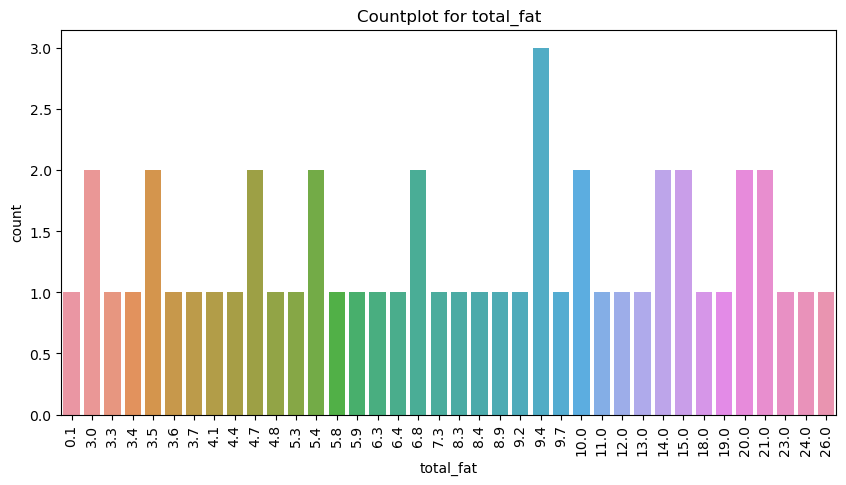

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(data=df.tail(50), x="total_fat")
plt.title('Countplot for total_fat')
plt.xticks(rotation=90)
plt.show()

In [45]:
df.kurt()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/1257127604.py:1: FutureWarning:

The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



calories           0.443294
total_fat          0.198006
saturated_fat      1.845411
cholesterol       -0.893955
sodium             4.176681
                    ...    
alcohol          511.432392
ash                1.815373
caffeine         313.045504
theobromine      308.942954
water              2.277163
Length: 73, dtype: float64

In [46]:
pd.set_option('display.max_rows', 74)
pd.DataFrame(df.kurt()) 

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/1422131387.py:2: FutureWarning:

The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



0
calories                           0.443294
total_fat                          0.198006
saturated_fat                      1.845411
cholesterol                       -0.893955
sodium                             4.176681
choline (mg)                       0.060299
folate (mcg)                      14.606283
folic_acid                        27.904388
niacin (mg)                       -0.506290
pantothenic_acid (mg)              0.587754
riboflavin (mg)                    0.480734
thiamin (mg)                       6.580331
vitamin_a                         58.240446
vitamin_a_rae (mcg)               23.021954
carotene_alpha (mcg)             132.339288
carotene_beta (mcg)               36.564648
cryptoxanthin_beta (mcg)          75.401721
lutein_zeaxanthin (mcg)           52.534056
vitamin_b12                        2.814857
vitamin_b6                        -0.229492
vitamin_c                         35.392812
vitamin_d                         23.999435
vitamin_e                          6.261222
tocopherol_alpha (mg)              6.261222
vitamin_k (mcg)                   43.216463
calcium                            7.374136
copper (mg)                       10.348918
irom                               2.196876
magnesium (mg)                     3.625016
manganese (mg)                     7.679021
phosphorous (mg)                  -1.136514
potassium (mg)                     0.520004
selenium (mcg)                    -0.446646
zink (mg)                          0.715179
protein                           -1.415870
alanine (g)                       -1.372052
arginine (g)                      -1.359374
aspartic_acid (g)                 -1.231827
cystine (g)                       -1.321937
glutamic_acid (g)                 -1.394096
glycine (g)                       -1.239794
histidine (g)                     -1.021432
hydroxyproline (0)                 4.568612
isoleucine (g)                    -1.280516
leucine (g)                       -1.318718
lysine (g)                        -1.293124
methionine (g)                    -1.308724
phenylalanine (g)                 -1.381236
proline (g)                       -1.372630
serine (g)                        -1.380323
threonine (g)                     -1.278037
tryptophan (g)                    -1.126811
tyrosine (g)                      -1.249402
valine (g)                        -1.292355
carbohydrate                       4.818125
fiber                              4.498610
sugars                            12.648649
fructose                          34.335512
galactose                        196.264241
glucose                           22.771250
lactose                          137.131211
maltose                           41.920936
sucrose                          132.117802
fat (g)                            0.190183
saturated_fatty_acids              1.263190
monounsaturated_fatty_acids (g)    0.653735
polyunsaturated_fatty_acids (g)    5.829329
fatty_acids_total_trans (mg)      -0.893955
alcohol                          511.432392
ash                                1.815373
caffeine                         313.045504
theobromine                      308.942954
water                              2.277163

In [47]:
df.skew()

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_4241/1665899112.py:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



calories                            0.785931
total_fat                           1.036191
saturated_fat                       1.415478
cholesterol                         0.590299
sodium                              1.972670
choline (mg)                        1.237100
folate (mcg)                        3.267626
folic_acid                          4.973760
niacin (mg)                         0.696968
pantothenic_acid (mg)               0.982154
riboflavin (mg)                     0.790750
thiamin (mg)                        2.482033
vitamin_a                           6.679971
vitamin_a_rae (mcg)                 4.256067
carotene_alpha (mcg)               10.925254
carotene_beta (mcg)                 5.649582
cryptoxanthin_beta (mcg)            8.250558
lutein_zeaxanthin (mcg)             6.823769
vitamin_b12                         1.686921
vitamin_b6                          0.945922
vitamin_c                           5.115090
vitamin_d                           4.184126
vitamin_e 

<Axes: xlabel='water', ylabel='sugars'>

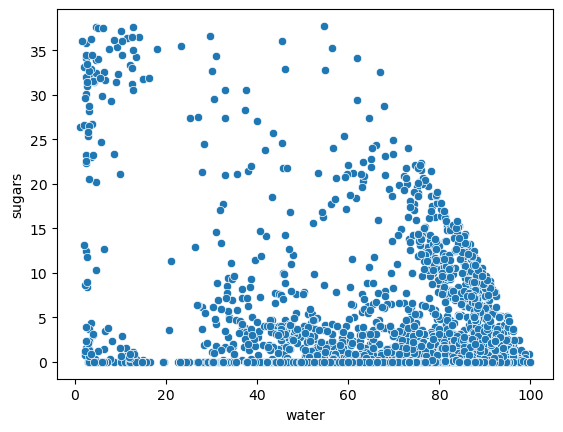

In [48]:
sns.scatterplot(data=df, x="water", y="sugars")

In [ ]:
sns.pairplot(df)

In [ ]:
df['sugars'].plot.density()
plt.title('Density plot for sugars')
plt.show()

In [ ]:
df[['water', 'sugars']].boxplot()

In [ ]:
plt.figure(figsize=(60,15))

hist_df = df[num_features]
              
hist_df.boxplot(figsize=(50,50))
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
sns.boxenplot(x = df['sugars'])

In [ ]:
sns.boxenplot(x=df['water'])

In [ ]:
fig, ax = plt.subplots(figsize=(70,20))
p = sns.boxenplot(data=hist_df)
p.set(ylabel='My yLabel', xlabel='My xLabel')
plt.show()

In [ ]:
# Get the vaariance for selected features
# variance = df[['vitamin_b12', 'vitamin_e', 'fiber', 'fructose', 'glucose', 'lactose', 'sucrose', 'alcohol', 'ash']].var()
variance = df[num_cols].var()
var_df = df[num_cols]

# Get column with max variance
print(variance.idxmax())

# Get column with min variance
print(variance.idxmin())

# Plot the bar plot
plt.figure(figsize=(15,8))
ax = sns.barplot(x=variance.index.tolist(), y=variance.values.tolist())
# Rotate X axis coordinates vertically.
plt.xticks(rotation='vertical')
plt.show()